In [30]:
def payingClubsVsFreeOnlyClubs(t):
    return DataFrame({'payingClubs': t[(t.feeValue>0)&(t.season==2015)]['toTeamId'].drop_duplicates().count(),
                      'allClubs': t[(t.season==2015)]['toTeamId'].drop_duplicates().count()},index=[0])

PayingComparison = nonloans[nonloans.toLeague.isin(leagueTables.league.drop_duplicates())].groupby('toLeague').apply(payingClubsVsFreeOnlyClubs).reset_index().drop('level_1',axis=1).set_index('toLeague')
PayingComparison['payingRatio']=PayingComparison['payingClubs']/PayingComparison['allClubs']
PayingComparison.sort_values('payingRatio')

,allClubs,payingClubs,payingRatio
toLeague,,,
LI1,8,0,0.000000
LET1,8,0,0.000000
FI1,12,0,0.000000
FARO,5,0,0.000000
EST1,9,0,0.000000
LUX1,14,0,0.000000
GEO1,16,0,0.000000
MAZ1,9,0,0.000000
NIR1,12,0,0.000000


In [34]:
def sellingClubsVsFreeOnlyClubs(t):
    return DataFrame({'sellingClubs': t[(t.feeValue>0)&(t.season==2015)]['fromTeamId'].drop_duplicates().count(),
                      'allClubs': t[(t.season==2015)]['fromTeamId'].drop_duplicates().count()},index=[0])

PayingComparison = nonloans[nonloans.fromLeague.isin(leagueTables.league.drop_duplicates())].groupby('fromLeague').apply(sellingClubsVsFreeOnlyClubs).reset_index().drop('level_1',axis=1).set_index('fromLeague')
PayingComparison['sellingRatio']=PayingComparison['sellingClubs']/PayingComparison['allClubs']
PayingComparison.sort_values('sellingClubs')

,allClubs,sellingClubs,sellingRatio
fromLeague,,,
MAZ1,9,0,0.000000
KAS1,12,0,0.000000
LET1,5,0,0.000000
LUX1,14,0,0.000000
FARO,6,0,0.000000
EST1,8,0,0.000000
MNE1,12,0,0.000000
IR1,12,0,0.000000
NIR1,9,0,0.000000


In [3]:
def transfercount(club):
    return club

clubSeasonInOut=DataFrame({'transfers out': nonloans.groupby(['fromTeamId','season']).count()['id'],
    'transfers in':nonloans.groupby(['toTeamId','season']).count()['id']}).fillna(0).reset_index().rename(columns={'level_0':'clubId','level_1':'season'})

def topTeams(league):
    t= league.groupby('clubId').agg({'points':'sum','clubName':'first','transfers in': 'mean','transfers out': 'mean','goalDiff':'sum','goalsFor':'sum','goalsAgainst':'sum','season':'count','rank': 'mean'}).sort_values('points',ascending=False)
    t['invRank']=league['rank'].max()-t['rank']
    t['scaleRank']=t['rank']/league['rank'].max()
    return t

RO1=leagueTables.merge(clubSeasonInOut).groupby('league').apply(topTeams).ix['RO1']

stabilityVsPerf=leagueTables[leagueTables['season'].between(2010,2015)].merge(clubSeasonInOut).groupby('league').apply(topTeams) #.ix['GR1'].sort_values('goalDiff').plot.scatter(x='transfers in',y='points')
stabilityVsPerf=stabilityVsPerf.join(nonloans[nonloans['season'].between(2010,2015)].rename(columns={'fromLeague':'league','fromTeamId':'clubId'}).groupby(['league','clubId'])[['duration']].mean())
stabilityVsPerf=stabilityVsPerf.join(transfers[transfers['season'].between(2010,2015)].rename(columns={'fromLeague':'league','fromTeamId':'clubId'}).groupby(['league','clubId'])[['durationWithLoans']].mean())

stabilityVsPerf=stabilityVsPerf.reset_index().merge(club_coeff,how='left',right_on='clubId',left_on='clubId',suffixes=('','_uefa'))

countryLeagueMap=nonloans[['fromCountry','fromLeague']].drop_duplicates().rename(columns={'fromLeague':'league','fromCountry':'Country'})

stabilityVsPerf=stabilityVsPerf.merge(countryLeagueMap,how='left',left_on='league',right_on='league').merge(countryInfo,how='left',left_on='Country',right_index=True)

ew = pd.ExcelWriter('../data/analysis/stability_performance.xls', encoding='utf-8')
stabilityVsPerf.to_excel(ew, merge_cells=False)
ew.save()

stabilityVsPerf

,league,clubId,transfers out,points,goalsAgainst,season,goalDiff,transfers in,clubName,rank,...,GDP 2013,GDP 2014,Unemployment,Corruption,Population,Growth %,federation,marketTier,Corruption Rank,Bribe %
0,A1,409,11.166667,435,210,6,274,12.500000,RB Salzburg,1.333333,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
1,A1,170,8.500000,366,231,6,127,8.500000,Rapid Vienna,2.666667,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
2,A1,14,10.666667,352,255,6,114,11.333333,Austria Vienna,3.666667,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
3,A1,122,11.333333,319,266,6,48,11.666667,Sturm Graz,4.000000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
4,A1,266,10.500000,281,304,6,-9,10.833333,SV Ried,5.833333,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
5,A1,503,9.600000,216,299,5,-65,11.600000,Admira Wacker,6.800000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
6,A1,17444,12.200000,187,326,5,-144,12.400000,Wiener Neustadt,8.200000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
7,A1,4441,8.500000,183,205,4,-25,9.250000,Wolfsberger AC,5.750000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
8,A1,2444,7.500000,160,232,4,-70,8.500000,FC Wacker,7.750000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
9,A1,856,4.750000,143,236,4,-90,7.000000,SV Mattersburg,9.000000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN


In [62]:
t=nonloans[(nonloans.Nationality!=nonloans.toCountry)&(~nonloans.toCountry.isin(['Italy','Turkey','Germany','United States']))&(nonloans.toTeamId.isin(stabilityVsPerf[stabilityVsPerf['transfers in']>20]['clubId']))&((nonloans.facebook.notnull())|(nonloans.twitter.notnull())|(nonloans.instagram.notnull()))]
t=t.merge(nonloans.groupby(['season','toTeamId'])[['id']].count(),how='left',right_index=True,left_on=['season','toTeamId'],suffixes=('','_y')).rename(columns={'id_y':'transfers'})

players2contact=t[t['transfers']>20][['id','playerName','season','Nationality','toTeamId','toTeamName','toCountry','facebook','twitter','instagram','transfers']]

ew = pd.ExcelWriter('../data/analysis/players2contact.xls', encoding='utf-8')
players2contact.to_excel(ew, merge_cells=False)
ew.save()

players2contact

,id,playerName,season,Nationality,toTeamId,toTeamName,toCountry,facebook,twitter,instagram,transfers
57539,195506,Volodya Papikyan,2011,Armenia,256,LKS Lodz,Poland,http://www.facebook.com/volodya.papikyan/,http://twitter.com/VolodyaPapikyan,NaN,21
57544,195505,Aghvan Papikyan,2011,Armenia,256,LKS Lodz,Poland,http://www.facebook.com/aghvan.papikyan94,http://twitter.com/Agwan94,NaN,21
123853,279468,Ricardo Radina,2015,Croatia,36590,Poli Timisoara,Romania,NaN,NaN,http://www.instagram.com/rradina77/,23
125624,32701,Joël Thomas,2012,France,34767,Turnu-Severin,Romania,http://www.facebook.com/joel.thomas.925,NaN,NaN,35
125937,106229,Alexandre Durimel,2012,France,34767,Turnu-Severin,Romania,http://www.facebook.com/alexandre.durimel,NaN,NaN,35
126066,177331,Antonio Asanovic,2012,Croatia,34767,Turnu-Severin,Romania,http://www.facebook.com/antonio.asanovic,NaN,NaN,35
126489,111995,Hamza Younes,2011,Tunisia,9465,Petr. Ploiesti,Romania,http://www.facebook.com/hamza.offishal,NaN,NaN,28
126493,111995,Hamza Younes,2015,Tunisia,15945,Chiajna,Romania,http://www.facebook.com/hamza.offishal,NaN,NaN,25
128832,60125,Igor Kojic,2010,Serbia,3393,D. Katokopias,Cyprus,NaN,http://twitter.com/igorkojic,http://instagram.com/igorkojic,21
131121,48662,Vitinha,2011,Portugal,15945,Chiajna,Romania,http://www.facebook.com/vitinha.vitortiago,NaN,NaN,27


In [51]:
t.merge(nonloans.groupby(['season','toTeamId'])[['id']].count(),how='left',right_index=True,left_on=['season','toTeamId'])

,id_x,playerName,date,season,fromCountry,fromLeague,fromTeamId,fromTeamName,toCountry,toLeague,...,website,feeValue,isLoan,age,ageFloat,period,mvDelta,duration,durationWithLoans,id_y
47066,2937,Helge Payer,2012-08-24,2012,Austria,A1,170,Rapid Vienna,Greece,Other Greece,...,http://www.helgepayer.com/,0.0,False,33.0,32.39765,"(2010, 2015]",0.0,4041.0,4041.0,13
57539,195506,Volodya Papikyan,2011-07-01,2011,Poland,Other Poland,15523,LKS U19,Poland,PL1,...,NaN,NaN,False,18.0,17.99079,"(2010, 2015]",NaN,NaN,NaN,21
57544,195505,Aghvan Papikyan,2011-07-01,2011,Poland,Other Poland,15523,LKS U19,Poland,PL1,...,NaN,NaN,False,17.0,16.89562,"(2010, 2015]",NaN,NaN,NaN,21
123853,279468,Ricardo Radina,2015-10-13,2015,NaN,NaN,515,Unattached,Romania,RO1,...,NaN,NaN,False,19.0,18.59586,"(2010, 2015]",0.0,104.0,104.0,23
124804,214781,Esmir Ahmetovic,2014-01-29,2013,NaN,NaN,75,Unknown,Romania,RO1,...,NaN,NaN,False,22.0,21.95801,"(2010, 2015]",0.0,181.0,181.0,18
125008,107849,Danijel Morariju,2014-01-29,2013,Albania,ALB1,13645,KS Lushnja,Romania,RO1,...,NaN,0.0,False,22.0,22.00182,"(2010, 2015]",0.0,152.0,152.0,18
125181,180447,Wilson Kneeshaw,2014-02-28,2013,England,GB21,9256,Boro U21,Romania,RO1,...,http://www.wilsonkneeshaw.com,0.0,False,19.0,18.62051,"(2010, 2015]",0.0,607.0,607.0,18
125535,99342,Edon Hasani,2014-01-29,2013,Romania,RO1,8687,C. Piatra Neamt,Romania,RO1,...,NaN,0.0,False,21.0,20.98058,"(2010, 2015]",-150000.0,198.0,198.0,18
125622,32701,Joël Thomas,2011-08-01,2011,Greece,Other Greece,553,Ionikos Nikea,Greece,Other Greece,...,NaN,0.0,False,24.0,23.50767,"(2010, 2015]",-125000.0,212.0,212.0,9
125624,32701,Joël Thomas,2012-07-01,2012,NaN,NaN,515,Unattached,Romania,RO1,...,NaN,NaN,False,25.0,24.50701,"(2010, 2015]",0.0,182.0,182.0,35


In [160]:
nonloans[(nonloans.toTeamId==34767)&(nonloans.facebook.notnull())]['id'] #.groupby('season').count()['id']

125624     32701
125937    106229
126066    177331
Name: id, dtype: int64

False    163
True      42
Name: goalDiffPerSeason, dtype: int64
3.82625482625


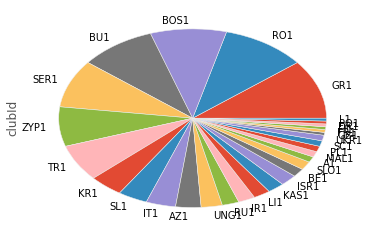

In [139]:
stabilityVsPerf['goalDiffPerSeason']=stabilityVsPerf.goalDiff/stabilityVsPerf.season
print stabilityVsPerf[(stabilityVsPerf['transfers in']>15)].goalDiffPerSeason.apply(lambda x:x>0).value_counts()
print stabilityVsPerf[(stabilityVsPerf['transfers in']>0)].season.mean()

stabilityVsPerf[(stabilityVsPerf['transfers in']>15)].groupby('league').count()['clubId'].sort_values(ascending=False).drop('MLS1').plot.pie() #.sum()


In [138]:
stabilityVsPerf[(stabilityVsPerf['goalDiff']>-10000)&(stabilityVsPerf.season>5)]['transfers in'].mean()

10.344551282051274

In [22]:
580 /831.

0.6979542719614922

In [120]:
stabilityVsPerf[stabilityVsPerf.Country.isnull()]

,league,clubId,transfers out,points,goalsAgainst,season,goalDiff,transfers in,clubName,rank,...,GDP 2013,GDP 2014,Unemployment,Corruption,Population,Growth %,federation,marketTier,Corruption Rank,Bribe %


In [118]:
countryLeagueMap=nonloans[['fromCountry','fromLeague']].drop_duplicates().rename(columns={'fromLeague':'league','fromCountry':'Country'})
stabilityVsPerf.merge(countryLeagueMap,how='left',left_on='league',right_on='league').merge(countryInfo,how='left',left_on='Country',right_index=True)

,league,clubId,transfers out,points,goalsAgainst,season,goalDiff,transfers in,clubName,rank,...,GDP 2013,GDP 2014,Unemployment,Corruption,Population,Growth %,federation,marketTier,Corruption Rank,Bribe %
0,A1,409,11.166667,435,210,6,274,12.500000,RB Salzburg,1.333333,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
1,A1,170,8.500000,366,231,6,127,8.500000,Rapid Vienna,2.666667,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
2,A1,14,10.666667,352,255,6,114,11.333333,Austria Vienna,3.666667,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
3,A1,122,11.333333,319,266,6,48,11.666667,Sturm Graz,4.000000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
4,A1,266,10.500000,281,304,6,-9,10.833333,SV Ried,5.833333,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
5,A1,503,9.600000,216,299,5,-65,11.600000,Admira Wacker,6.800000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
6,A1,17444,12.200000,187,326,5,-144,12.400000,Wiener Neustadt,8.200000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
7,A1,4441,8.500000,183,205,4,-25,9.250000,Wolfsberger AC,5.750000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
8,A1,2444,7.500000,160,232,4,-70,8.500000,FC Wacker,7.750000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN
9,A1,856,4.750000,143,236,4,-90,7.000000,SV Mattersburg,9.000000,...,428.456,437.123,10.6,76.0,8608000.0,0.67,UEFA,2.0,NaN,NaN


In [72]:
stabilityVsPerf[(stabilityVsPerf['clubName']!=stabilityVsPerf['clubName_uefa'])&(stabilityVsPerf['clubName_uefa'].notnull())]

,league,clubId,transfers out,points,goalsAgainst,season,goalDiff,transfers in,clubName,rank,...,scaleRank,duration,durationWithLoans,rank_uefa,clubName_uefa,coeff12,coeff13,coeff14,coeff15,points_uefa
247,GR1,128,20.166667,230,223,6,-20,19.833333,Skoda Xanthi,10.666667,...,0.592593,730.115702,567.033113,205.0,AO Xanthi,880.0,2220.0,1240.0,960.0,5300.0
369,L1,27,6.333333,486,138,6,372,6.000000,Bayern Munich,1.500000,...,0.083333,1390.184211,1004.750000,2.0,Bayern Munich,36585.0,29942.0,31171.0,32285.0,129983.0
619,RU1,2703,18.000000,19,53,1,-27,16.000000,Alania,16.000000,...,1.000000,708.470588,595.578947,157.0,Spartak,1950.0,2083.0,1933.0,1700.0,7666.0
690,SL1,710,16.666667,275,285,6,-41,15.333333,NK Celje,6.000000,...,0.600000,539.793478,465.450820,312.0,NK Celje,900.0,775.0,800.0,450.0,2925.0
789,UNG1,6055,10.200000,268,175,5,77,9.200000,ETO FC Győr,4.600000,...,0.287500,1092.285714,739.585714,306.0,ETO FC Győr,600.0,1175.0,925.0,325.0,3025.0
796,UNG1,12423,13.000000,199,226,5,-19,13.000000,Kecskeméti TE,8.800000,...,0.550000,636.746032,506.000000,387.0,Kecskeméti LC,600.0,175.0,425.0,325.0,1525.0


In [43]:
stabilityVsPerf.join(nonloans[nonloans['season'].between(2010,2015)].rename(columns={'fromLeague':'league','fromTeamId':'clubId'}).groupby(['league','clubId'])[['duration','durationWithLoans']].mean())

transfers out  points  goalsAgainst  season  goalDiff  \
league clubId                                                          
A1     409         11.166667     435           210       6       274   
       170          8.500000     366           231       6       127   
       14          10.666667     352           255       6       114   
       122         11.333333     319           266       6        48   
       266         10.500000     281           304       6        -9   
       503          9.600000     216           299       5       -65   
       17444       12.200000     187           326       5      -144   
       4441         8.500000     183           205       4       -25   
       2444         7.500000     160           232       4       -70   
       856          4.750000     143           236       4       -90   
       10131       10.333333     126           192       3       -36   
       3551         2.500000      99            98       2        -9   
       2394        17.500000      61           125       2       -62   
       413         19.000000      19            75       1       -53   
AZ1    10625       10.000000     310           100       5       147   
       8956        14.600000     278           108       5        94   
       8031        11.600000     251           160       5        59   
       22010       15.200000     247           149       5        44   
       13326       15.600000     175           191       5       -30   
       8841        16.200000     171           192       5       -30   
       13328        8.750000     143           116       4         5   
       10693       15.750000     142           149       4       -24   
       36999       11.600000     132           232       5       -98   
       33315       14.750000      90           192       4       -98   
       7090        11.666667      88           123       3       -37   
       46710        9.000000      62            30       1        12   
       9526        15.000000      34            68       2       -31   
       44360       29.000000       4            20       1       -13   
BE1    58          10.666667     368           163       6       188   
       2282        12.000000     356           196       6       168   
...                      ...     ...           ...     ...       ...   
UNG1   5378        15.333333      96           151       3       -56   
       3552        13.333333      95           143       3       -53   
       1391        10.000000      61           112       2       -36   
       6058        11.000000      30            49       1       -16   
       6049         4.000000      27            55       1       -30   
       24032        9.000000      24            52       1       -25   
       27165       10.000000      23            49       1       -23   
       5399        13.000000      21            56       1       -30   
       27397       13.000000      15            67       1       -42   
ZYP1   2784        11.333333     351            91       6       221   
       829         14.000000     295           122       6       136   
       3899        15.166667     285           144       6       115   
       2156        15.333333     276           140       6       104   
       429         15.000000     268           169       6        72   
       786         18.166667     267           143       6        67   
       4590        17.666667     153           208       6       -62   
       18945       19.400000     149           188       5       -58   
       24326       23.000000     148           184       5       -46   
       840         18.600000     135           176       5       -53   
       3393        22.400000     122           219       5       -90   
       1402        17.000000      93           119       3       -13   
       8701        18.750000      90           204       4       -95   
       10586       13.000000      78           106     

In [51]:
leagueTables.merge(clubSeasonInOut)

,league,season,rank,clubId,clubName,matches,wins,draws,losses,goalsFor,goalsAgainst,goalDiff,points,pointsRaw,transfers in,transfers out
0,GB1,2015,1,1003,Leicester,38,23,12,3,68,36,32,81,81,8.0,12.0
1,GB1,2015,2,11,Arsenal,38,20,11,7,65,36,29,71,71,7.0,4.0
2,GB1,2015,3,148,Spurs,38,19,13,6,69,35,34,70,70,6.0,20.0
3,GB1,2015,4,281,Manchester City,38,19,9,10,71,41,30,66,66,9.0,13.0
4,GB1,2015,5,985,Manchester Utd.,38,19,9,10,49,35,14,66,66,11.0,13.0
5,GB1,2015,6,180,Southampton,38,18,9,11,59,41,18,63,63,7.0,7.0
6,GB1,2015,7,379,West Ham,38,16,14,8,65,51,14,62,62,11.0,14.0
7,GB1,2015,8,31,Liverpool,38,16,12,10,63,50,13,60,60,10.0,10.0
8,GB1,2015,9,512,Stoke City,38,14,9,15,41,55,-14,51,51,8.0,7.0
9,GB1,2015,10,631,Chelsea,38,12,14,12,59,53,6,50,50,10.0,9.0


In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers_q.csv')
loans = pd.read_csv('../data/merged/loans.csv')
nonloans = pd.read_csv('../data/merged/nonloans.csv')
players=pd.read_csv('../data/merged/players.csv')
leagueTables=pd.read_csv('../data/merged/leagueTables.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

teamIdMap = pd.concat([transfers[['toTeamId','toTeamName','season']].rename(columns={'toTeamId':'teamId','toTeamName':'teamName'}),
    transfers[['fromTeamId','fromTeamName','season']].rename(columns={'fromTeamId':'teamId','fromTeamName':'teamName'})],ignore_index=True) \
    .sort_values('season',ascending=False).drop_duplicates('teamId').set_index('teamId')['teamName'].to_dict()
    
agentIdMap = transfers[['playersAgentId','playersAgent']].sort_values('playersAgent',ascending=False).drop_duplicates('playersAgentId').set_index('playersAgentId')['playersAgent'].to_dict()

leagueList = ['GB1','ES1','L1','IT1','FR1','PO1','NL1','TR1','RU1','BE1','MLS1','UKR1','GR1','RO1','ZYP1','KR1','SER1','BOS1','BU1','DK1','SE1','NO1','LI1','SC1','ISR1','PL1','UNG1','A1','C1','MAL1','KAS1','TS1','SLO1','SL1','FI1','LUX1','AZ1','IR1']

countryInfo=pd.read_excel('../data/reference/countries.xls').set_index('country')
countryInfo.marketTier=np.where(countryInfo.marketTier==4,3,countryInfo.marketTier)

top20clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:20].index
top50clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:50].index
top100clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:100].index

uefa=countryInfo[countryInfo.federation=='UEFA'].index
caf=countryInfo[countryInfo.federation=='CAF'].index
concacaf=countryInfo[countryInfo.federation=='CONCACAF'].index
concacaf_no_uscan=countryInfo[countryInfo.federation=='CONCACAF'].drop(['United States','Canada']).index
conmebol=countryInfo[countryInfo.federation=='CONMEBOL'].index
afc=countryInfo[countryInfo.federation=='AFC'].index
afc_no_anzac=countryInfo[countryInfo.federation=='AFC'].drop(['Australia','New Zealand']).index

country_coeff=pd.read_csv('../data/reference/country_coefficient2.csv').reset_index(drop=True).set_index('Country').rename(index={
        'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
        'Republic of Ireland': 'Ireland',
        'FYR Macedonia': 'Macedonia',
        'Faroe Islands':'Faroe Islands'
    })

natteam_coeff=pd.read_table('../data/reference/national_team_coefficient.csv').reset_index(drop=True).drop('Rank',axis=1)
natteam_coeff['Country']=natteam_coeff['Country'].str.strip()
natteam_coeff.Coefficient=natteam_coeff.Coefficient.apply(lambda s: int(s.replace(',','')))
natteam_coeff=natteam_coeff.rename(columns={'Coefficient':'National team coeff'}).set_index('Country')

club_coeff=pd.read_csv('../data/reference/club_coefficients.csv')[['rank','clubId','clubName','coeff12','coeff13','coeff14','coeff15','points']]

gdp=pd.read_table('../data/reference/country_gdp.csv').reset_index(drop=True).drop('2014 Rank',axis=1).rename(columns={'Country ':'Country'})
gdp.Country=gdp.Country.str.strip()
gdp=gdp.set_index('Country')
gdp.columns=['GDP '+c for c in gdp.columns.str.strip()]
for column in gdp.columns:
    gdp[column]=gdp[column].apply(lambda s: float(str(s).replace(',','')))
    
unemployed=pd.read_table('../data/reference/country_unemployment.csv').drop(['Date','Employment rate'],axis=1)
unemployed.columns=['Country','Unemployment']
unemployed['Country']=unemployed['Country'].str.split(' ').apply(lambda arr: ' '.join(arr[:len(arr)/2]))
unemployed=unemployed.set_index('Country').rename(index={'United Kingdom':'England'})

corruption=pd.read_table('../data/reference/country_corruption.csv').drop(['Rank'],axis=1)
corruption.Country=corruption.Country.str.strip()
corruption=corruption.set_index('Country')
corruption=corruption[corruption.columns[:1]].rename(columns={'2015 score':'Corruption'}).rename(index={'United Kingdom':'England'})

population=pd.read_table('../data/reference/country_population.csv').drop(['Rank'],axis=1)
population.columns=population.columns.str.strip()
population.Country=population.Country.str.split('[',expand=True)[0].str.strip()
population['Population']=population['Population'].apply(lambda s: float(str(s).replace(',','')))
population=population[['Country','Population','Growth %']].set_index('Country').rename(index={'United Kingdom':'England'})

barometer=pd.read_table('../data/reference/country_corruption_barometer.csv').reset_index(drop=True)
barometer.columns=['Corruption Rank','Country','Bribe %']
barometer.Country=barometer.Country.str.strip()
barometer=barometer.set_index('Country').rename(index={'United Kingdom':'England'})

countryInfo=natteam_coeff.join(country_coeff).join(gdp).join(unemployed).join(corruption).join(population).join(countryInfo).join(barometer)

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (0,38,40,41,45,47,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (40,45,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (32,34) have mixed types. Specify dtype option on import or set low_memory=False

In [96]:
country_coeff=pd.read_csv('../data/reference/country_coefficient2.csv').reset_index(drop=True).set_index('Country').rename(index={
        'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
        'Republic of Ireland': 'Ireland',
        'FYR Macedonia': 'Macedonia',
        'Faroe Islands':'Faroe Islands'
    }).join(countryInfo)

In [111]:
countryLeagueMap=nonloans[['fromCountry','fromLeague']].drop_duplicates().rename(columns={'fromLeague':'league','fromCountry':'Country'})


#.set_index('Country').join(countryInfo)

,Country,league
0,England,Other England
1,England,GBJG
2,England,GB21
3,England,GB1
4,NaN,NaN
5,England,GB4
8,Ireland,Other Ireland
12,Germany,Other Germany
17,England,GB2
19,England,CNAT


In [94]:
countryInfo

,National team coeff,2012 coeff,2013 coeff,2014 coeff,2015 coeff,total coeff,GDP 2010,GDP 2011,GDP 2012,GDP 2013,GDP 2014,Unemployment,Corruption,Population,Growth %,federation,marketTier,Corruption Rank,Bribe %
Country,,,,,,,,,,,,,,,,,,,
Germany,40236,17.928,14.714,15.857,16.428,64.927,3418.371,3755.549,3535.199,3831.427,3859.547,4.5,81.0,81459000.0,0.32,UEFA,1.0,NaN,NaN
Spain,37962,17.714,23.000,20.214,23.928,84.856,1434.257,1495.968,1356.483,1393.476,1406.855,21.4,58.0,46423064.0,-0.06,UEFA,1.0,5.0,2.0
England,35963,16.428,16.785,13.571,14.250,61.034,2409.409,2594.114,2624.291,2680.123,2945.146,5.1,81.0,65081276.0,0.75,UEFA,1.0,17.0,5.0
Portugal,35138,11.750,9.916,9.083,10.500,41.249,238.748,245.120,216.488,224.983,230.012,12.4,63.0,10311000.0,-0.56,UEFA,2.0,6.0,3.0
Belgium,34442,6.500,6.400,9.600,7.400,29.900,485.307,528.721,499.129,524.970,534.672,7.8,77.0,11259000.0,0.52,UEFA,2.0,14.0,4.0
Italy,34345,14.416,14.166,19.000,11.500,59.082,2130.586,2280.315,2076.370,2137.615,2147.952,11.3,44.0,60963000.0,0.49,UEFA,1.0,17.0,5.0
Netherlands,33679,4.214,5.916,6.083,5.750,21.963,837.949,894.576,823.595,853.806,866.354,6.6,87.0,17003777.0,0.37,UEFA,2.0,NaN,NaN
France,33599,11.750,8.500,10.916,11.083,42.249,2651.772,2865.304,2688.210,2807.306,2846.889,10.6,70.0,66417000.0,0.39,UEFA,1.0,NaN,NaN
Russia,31345,9.750,10.416,9.666,11.500,41.332,1524.915,1904.790,2015.154,2079.134,1857.461,5.8,29.0,144031000.0,0.19,UEFA,2.0,NaN,NaN
